In [1]:
import keras,os
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
import shutil

In [2]:
DATASET_PATH  = '../../people_and_animals/resnet_data'
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 4
BATCH_SIZE = 8
FREEZE_LAYERS = 2
NUM_EPOCHS = 20
WEIGHTS_FINAL = 'resnet_mouth_model.weight'

In [3]:
# 刪除 .ipynb_checlpoints
# import os
# os.rmdir("../../people_and_animals/resnet_data/mouth_train/.ipynb_checkpoints")
# os.rmdir("../../people_and_animals/resnet_data/mouth_v/.ipynb_checkpoints")

In [4]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_batches = train_datagen.flow_from_directory(DATASET_PATH + '/mouth_train',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE)

Found 764 images belonging to 4 classes.


In [5]:
valid_datagen = ImageDataGenerator()
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH + '/mouth_v',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE)

Found 16 images belonging to 4 classes.


In [6]:
for cls, idx in train_batches.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))

Class #0 = A
Class #1 = B
Class #2 = C
Class #3 = D


In [7]:
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)

In [8]:
x = Dropout(0.5)(x)

In [9]:
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

In [10]:
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

In [11]:
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
print(net_final.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [13]:
hist = net_final.fit_generator(steps_per_epoch=1,generator=train_batches, validation_data= valid_batches, validation_steps=1,epochs=8000)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8000
1/1 [==============================] - 1s 768ms/step - loss: 3.4739 - accuracy: 0.2500 - val_loss: 4.2423 - val_accuracy: 0.0000e+00
Epoch 2/8000
1/1 [==============================] - 0s 246ms/step - loss: 2.2927 - accuracy: 0.3750 - val_loss: 4.2123 - val_accuracy: 0.0000e+00
Epoch 3/8000
1/1 [==============================] - 0s 246ms/step - loss: 3.9836 - accuracy: 0.2500 - val_loss: 4.1293 - val_accuracy: 0.0000e+00
Epoch 4/8000
1/1 [==============================] - 0s 241ms/step - loss: 2.6182 - accuracy: 0.2500 - val_loss: 4.0626 - val_accuracy: 0.0000e+00
Epoch 5/8000
1/1 [==============================] - 0s 244ms/step - loss: 2.7181 - accuracy: 0.1250 - val_loss: 4.0659 - val_accuracy: 0.0000e+00
Epoch 6/8000
1/1 [==============================] - 0s 244ms/step - loss: 2.5163 - accuracy: 0.5000 - val_loss: 4.0437 - val_accuracy: 0.0000e+00
Epoch 7/8000
1/1 [==============================

1/1 [==============================] - 0s 248ms/step - loss: 0.8687 - accuracy: 0.7500 - val_loss: 2.3305 - val_accuracy: 0.1250
Epoch 57/8000
1/1 [==============================] - 0s 244ms/step - loss: 3.2214 - accuracy: 0.1250 - val_loss: 2.3654 - val_accuracy: 0.1250
Epoch 58/8000
1/1 [==============================] - 0s 245ms/step - loss: 1.7281 - accuracy: 0.3750 - val_loss: 2.3742 - val_accuracy: 0.1250
Epoch 59/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.8339 - accuracy: 0.5000 - val_loss: 2.3805 - val_accuracy: 0.1250
Epoch 60/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.7369 - accuracy: 0.7500 - val_loss: 2.3945 - val_accuracy: 0.1250
Epoch 61/8000
1/1 [==============================] - 0s 246ms/step - loss: 1.9557 - accuracy: 0.6250 - val_loss: 2.4061 - val_accuracy: 0.1250
Epoch 62/8000
1/1 [==============================] - 0s 248ms/step - loss: 2.8951 - accuracy: 0.1250 - val_loss: 2.3997 - val_accuracy: 0.1250
Epoch 63/8000

Epoch 170/8000
1/1 [==============================] - 0s 243ms/step - loss: 1.8307 - accuracy: 0.6250 - val_loss: 1.1278 - val_accuracy: 0.6250
Epoch 171/8000
1/1 [==============================] - 0s 246ms/step - loss: 2.6424 - accuracy: 0.3750 - val_loss: 1.1330 - val_accuracy: 0.6250
Epoch 172/8000
1/1 [==============================] - 0s 242ms/step - loss: 3.3311 - accuracy: 0.1250 - val_loss: 1.1289 - val_accuracy: 0.6250
Epoch 173/8000
1/1 [==============================] - 0s 246ms/step - loss: 1.5682 - accuracy: 0.5000 - val_loss: 1.1229 - val_accuracy: 0.6250
Epoch 174/8000
1/1 [==============================] - 0s 238ms/step - loss: 1.2412 - accuracy: 0.5000 - val_loss: 1.1256 - val_accuracy: 0.6250
Epoch 175/8000
1/1 [==============================] - 0s 248ms/step - loss: 1.5815 - accuracy: 0.5000 - val_loss: 1.1240 - val_accuracy: 0.6250
Epoch 176/8000
1/1 [==============================] - 0s 247ms/step - loss: 1.1377 - accuracy: 0.6250 - val_loss: 1.1207 - val_accuracy:

Epoch 227/8000
1/1 [==============================] - 0s 240ms/step - loss: 1.2174 - accuracy: 0.3750 - val_loss: 1.2041 - val_accuracy: 0.6250
Epoch 228/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.0607 - accuracy: 0.7500 - val_loss: 1.2079 - val_accuracy: 0.6250
Epoch 229/8000
1/1 [==============================] - 0s 243ms/step - loss: 2.2644 - accuracy: 0.3750 - val_loss: 1.2013 - val_accuracy: 0.6250
Epoch 230/8000
1/1 [==============================] - 0s 245ms/step - loss: 1.3872 - accuracy: 0.7500 - val_loss: 1.1903 - val_accuracy: 0.6250
Epoch 231/8000
1/1 [==============================] - 0s 248ms/step - loss: 1.2556 - accuracy: 0.5000 - val_loss: 1.1773 - val_accuracy: 0.6250
Epoch 232/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.7381 - accuracy: 0.7500 - val_loss: 1.1721 - val_accuracy: 0.6250
Epoch 233/8000
1/1 [==============================] - 0s 244ms/step - loss: 1.7103 - accuracy: 0.6250 - val_loss: 1.1690 - val_accuracy:

Epoch 284/8000
1/1 [==============================] - 0s 241ms/step - loss: 3.5949 - accuracy: 0.2500 - val_loss: 0.8323 - val_accuracy: 0.7500
Epoch 285/8000
1/1 [==============================] - 0s 241ms/step - loss: 3.5377 - accuracy: 0.2500 - val_loss: 0.8526 - val_accuracy: 0.7500
Epoch 286/8000
1/1 [==============================] - 0s 246ms/step - loss: 2.2312 - accuracy: 0.6250 - val_loss: 0.8777 - val_accuracy: 0.7500
Epoch 287/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.6998 - accuracy: 0.5000 - val_loss: 0.9005 - val_accuracy: 0.7500
Epoch 288/8000
1/1 [==============================] - 0s 244ms/step - loss: 1.6825 - accuracy: 0.3750 - val_loss: 0.9228 - val_accuracy: 0.7500
Epoch 289/8000
1/1 [==============================] - 0s 242ms/step - loss: 2.5949 - accuracy: 0.2500 - val_loss: 0.9353 - val_accuracy: 0.7500
Epoch 290/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.4025 - accuracy: 0.7500 - val_loss: 0.9448 - val_accuracy:

Epoch 341/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.5286 - accuracy: 0.8750 - val_loss: 0.9728 - val_accuracy: 0.8750
Epoch 342/8000
1/1 [==============================] - 0s 243ms/step - loss: 1.8702 - accuracy: 0.5000 - val_loss: 0.9912 - val_accuracy: 0.8750
Epoch 343/8000
1/1 [==============================] - 0s 244ms/step - loss: 1.4972 - accuracy: 0.5000 - val_loss: 0.9867 - val_accuracy: 0.8750
Epoch 344/8000
1/1 [==============================] - 0s 250ms/step - loss: 0.9399 - accuracy: 0.7500 - val_loss: 0.9896 - val_accuracy: 0.8750
Epoch 345/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.4365 - accuracy: 0.6250 - val_loss: 1.0033 - val_accuracy: 0.8750
Epoch 346/8000
1/1 [==============================] - 0s 244ms/step - loss: 2.1026 - accuracy: 0.6250 - val_loss: 1.0176 - val_accuracy: 0.8750
Epoch 347/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.7545 - accuracy: 0.6250 - val_loss: 1.0319 - val_accuracy:

Epoch 398/8000
1/1 [==============================] - 0s 250ms/step - loss: 1.6132 - accuracy: 0.6250 - val_loss: 1.1062 - val_accuracy: 0.7500
Epoch 399/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.7966 - accuracy: 0.7500 - val_loss: 1.0869 - val_accuracy: 0.7500
Epoch 400/8000
1/1 [==============================] - 0s 248ms/step - loss: 0.9842 - accuracy: 0.6250 - val_loss: 1.0753 - val_accuracy: 0.7500
Epoch 401/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.4242 - accuracy: 0.8750 - val_loss: 1.0594 - val_accuracy: 0.7500
Epoch 402/8000
1/1 [==============================] - 0s 239ms/step - loss: 2.3387 - accuracy: 0.3750 - val_loss: 1.0403 - val_accuracy: 0.7500
Epoch 403/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.4500 - accuracy: 0.7500 - val_loss: 1.0191 - val_accuracy: 0.7500
Epoch 404/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.1548 - accuracy: 0.6250 - val_loss: 0.9974 - val_accuracy:

Epoch 455/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.4339 - accuracy: 0.6250 - val_loss: 0.8209 - val_accuracy: 0.8750
Epoch 456/8000
1/1 [==============================] - 0s 243ms/step - loss: 1.1609 - accuracy: 0.5000 - val_loss: 0.8450 - val_accuracy: 0.7500
Epoch 457/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.7377 - accuracy: 0.7500 - val_loss: 0.8628 - val_accuracy: 0.7500
Epoch 458/8000
1/1 [==============================] - 0s 247ms/step - loss: 0.2234 - accuracy: 1.0000 - val_loss: 0.8759 - val_accuracy: 0.7500
Epoch 459/8000
1/1 [==============================] - 0s 244ms/step - loss: 2.3016 - accuracy: 0.3750 - val_loss: 0.8681 - val_accuracy: 0.7500
Epoch 460/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.4194 - accuracy: 0.5000 - val_loss: 0.8731 - val_accuracy: 0.8750
Epoch 461/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.3775 - accuracy: 0.5000 - val_loss: 0.8736 - val_accuracy:

Epoch 512/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.9000 - accuracy: 0.7500 - val_loss: 1.2999 - val_accuracy: 0.6250
Epoch 513/8000
1/1 [==============================] - 0s 244ms/step - loss: 1.7750 - accuracy: 0.5000 - val_loss: 1.2808 - val_accuracy: 0.6250
Epoch 514/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.9579 - accuracy: 0.6250 - val_loss: 1.2640 - val_accuracy: 0.6250
Epoch 515/8000
1/1 [==============================] - 0s 247ms/step - loss: 0.5877 - accuracy: 0.7500 - val_loss: 1.2409 - val_accuracy: 0.6250
Epoch 516/8000
1/1 [==============================] - 0s 241ms/step - loss: 2.1774 - accuracy: 0.5000 - val_loss: 1.2134 - val_accuracy: 0.6250
Epoch 517/8000
1/1 [==============================] - 0s 240ms/step - loss: 3.0661 - accuracy: 0.3750 - val_loss: 1.2287 - val_accuracy: 0.6250
Epoch 518/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.4977 - accuracy: 0.7500 - val_loss: 1.1966 - val_accuracy:

Epoch 569/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.6083 - accuracy: 0.7500 - val_loss: 1.0695 - val_accuracy: 0.7500
Epoch 570/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.5818 - accuracy: 0.6250 - val_loss: 1.0604 - val_accuracy: 0.7500
Epoch 571/8000
1/1 [==============================] - 0s 242ms/step - loss: 2.0023 - accuracy: 0.2500 - val_loss: 1.0628 - val_accuracy: 0.7500
Epoch 572/8000
1/1 [==============================] - 0s 240ms/step - loss: 2.2187 - accuracy: 0.3750 - val_loss: 1.0465 - val_accuracy: 0.7500
Epoch 573/8000
1/1 [==============================] - 0s 242ms/step - loss: 2.8249 - accuracy: 0.2500 - val_loss: 1.0291 - val_accuracy: 0.7500
Epoch 574/8000
1/1 [==============================] - 0s 239ms/step - loss: 1.1651 - accuracy: 0.6250 - val_loss: 1.0253 - val_accuracy: 0.7500
Epoch 575/8000
1/1 [==============================] - 0s 248ms/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 1.0201 - val_accuracy:

Epoch 626/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.2290 - accuracy: 0.8750 - val_loss: 1.2789 - val_accuracy: 0.6250
Epoch 627/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.4221 - accuracy: 0.7500 - val_loss: 1.2728 - val_accuracy: 0.6250
Epoch 628/8000
1/1 [==============================] - 0s 244ms/step - loss: 1.1198 - accuracy: 0.6250 - val_loss: 1.2625 - val_accuracy: 0.6250
Epoch 629/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.7092 - accuracy: 0.7500 - val_loss: 1.2601 - val_accuracy: 0.6250
Epoch 630/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.1700 - accuracy: 0.7500 - val_loss: 1.2371 - val_accuracy: 0.6250
Epoch 631/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.5692 - accuracy: 0.8750 - val_loss: 1.2301 - val_accuracy: 0.6250
Epoch 632/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.3363 - accuracy: 0.7500 - val_loss: 1.2445 - val_accuracy:

Epoch 683/8000
1/1 [==============================] - 0s 239ms/step - loss: 3.4808 - accuracy: 0.2500 - val_loss: 1.3173 - val_accuracy: 0.6250
Epoch 684/8000
1/1 [==============================] - 0s 240ms/step - loss: 2.2698 - accuracy: 0.7500 - val_loss: 1.3240 - val_accuracy: 0.6250
Epoch 685/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.3317 - accuracy: 0.7500 - val_loss: 1.3214 - val_accuracy: 0.6250
Epoch 686/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.3649 - accuracy: 0.6250 - val_loss: 1.3340 - val_accuracy: 0.6250
Epoch 687/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.3712 - accuracy: 0.8750 - val_loss: 1.3594 - val_accuracy: 0.6250
Epoch 688/8000
1/1 [==============================] - 0s 240ms/step - loss: 1.2161 - accuracy: 0.6250 - val_loss: 1.3595 - val_accuracy: 0.6250
Epoch 689/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.2118 - accuracy: 0.8750 - val_loss: 1.3534 - val_accuracy:

Epoch 740/8000
1/1 [==============================] - 0s 235ms/step - loss: 1.4993 - accuracy: 0.6250 - val_loss: 1.1233 - val_accuracy: 0.6250
Epoch 741/8000
1/1 [==============================] - 0s 245ms/step - loss: 1.7251 - accuracy: 0.6250 - val_loss: 1.0843 - val_accuracy: 0.6250
Epoch 742/8000
1/1 [==============================] - 0s 243ms/step - loss: 1.6706 - accuracy: 0.6250 - val_loss: 1.0648 - val_accuracy: 0.6250
Epoch 743/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.2113 - accuracy: 0.8750 - val_loss: 1.0499 - val_accuracy: 0.6250
Epoch 744/8000
1/1 [==============================] - 0s 246ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 1.0296 - val_accuracy: 0.6250
Epoch 745/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.8016 - accuracy: 0.7500 - val_loss: 0.9775 - val_accuracy: 0.6250
Epoch 746/8000
1/1 [==============================] - 0s 246ms/step - loss: 1.4727 - accuracy: 0.5000 - val_loss: 0.9672 - val_accuracy:

Epoch 797/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.9193 - accuracy: 0.6250 - val_loss: 0.9414 - val_accuracy: 0.7500
Epoch 798/8000
1/1 [==============================] - 0s 249ms/step - loss: 1.6946 - accuracy: 0.6250 - val_loss: 0.9133 - val_accuracy: 0.7500
Epoch 799/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.3179 - accuracy: 0.8750 - val_loss: 0.8951 - val_accuracy: 0.7500
Epoch 800/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.5631 - accuracy: 0.7500 - val_loss: 0.8720 - val_accuracy: 0.7500
Epoch 801/8000
1/1 [==============================] - 0s 243ms/step - loss: 1.3896 - accuracy: 0.6250 - val_loss: 0.8614 - val_accuracy: 0.7500
Epoch 802/8000
1/1 [==============================] - 0s 243ms/step - loss: 1.4734 - accuracy: 0.3750 - val_loss: 0.8436 - val_accuracy: 0.7500
Epoch 803/8000
1/1 [==============================] - 0s 243ms/step - loss: 1.1241 - accuracy: 0.7500 - val_loss: 0.8425 - val_accuracy:

Epoch 854/8000
1/1 [==============================] - 0s 239ms/step - loss: 1.9644 - accuracy: 0.5000 - val_loss: 0.9647 - val_accuracy: 0.7500
Epoch 855/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.3472 - accuracy: 0.8750 - val_loss: 0.9570 - val_accuracy: 0.7500
Epoch 856/8000
1/1 [==============================] - 0s 238ms/step - loss: 2.0191 - accuracy: 0.5000 - val_loss: 0.9556 - val_accuracy: 0.7500
Epoch 857/8000
1/1 [==============================] - 0s 238ms/step - loss: 1.5086 - accuracy: 0.6250 - val_loss: 0.9466 - val_accuracy: 0.7500
Epoch 858/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.1373 - accuracy: 0.8750 - val_loss: 0.9294 - val_accuracy: 0.7500
Epoch 859/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.6329 - accuracy: 0.8750 - val_loss: 0.9199 - val_accuracy: 0.7500
Epoch 860/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.5729 - accuracy: 0.7500 - val_loss: 0.9054 - val_accuracy:

Epoch 911/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.9804 - accuracy: 0.7500 - val_loss: 0.7892 - val_accuracy: 0.7500
Epoch 912/8000
1/1 [==============================] - 0s 239ms/step - loss: 1.0064 - accuracy: 0.6250 - val_loss: 0.7782 - val_accuracy: 0.7500
Epoch 913/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.4489 - accuracy: 0.8750 - val_loss: 0.7699 - val_accuracy: 0.7500
Epoch 914/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.6337 - accuracy: 0.6250 - val_loss: 0.7620 - val_accuracy: 0.7500
Epoch 915/8000
1/1 [==============================] - 0s 237ms/step - loss: 0.7648 - accuracy: 0.8750 - val_loss: 0.7464 - val_accuracy: 0.7500
Epoch 916/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.2593 - accuracy: 0.6250 - val_loss: 0.7356 - val_accuracy: 0.7500
Epoch 917/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.3383 - accuracy: 0.8750 - val_loss: 0.7177 - val_accuracy:

Epoch 968/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.5405 - accuracy: 0.6250 - val_loss: 1.0147 - val_accuracy: 0.7500
Epoch 969/8000
1/1 [==============================] - 0s 244ms/step - loss: 1.8741 - accuracy: 0.5000 - val_loss: 1.0091 - val_accuracy: 0.7500
Epoch 970/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.8073 - accuracy: 0.8750 - val_loss: 1.0100 - val_accuracy: 0.7500
Epoch 971/8000
1/1 [==============================] - 0s 241ms/step - loss: 2.1784 - accuracy: 0.3750 - val_loss: 1.0113 - val_accuracy: 0.7500
Epoch 972/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.3371 - accuracy: 0.8750 - val_loss: 0.9840 - val_accuracy: 0.7500
Epoch 973/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.9676 - accuracy: 0.7500 - val_loss: 0.9297 - val_accuracy: 0.7500
Epoch 974/8000
1/1 [==============================] - 0s 237ms/step - loss: 0.2718 - accuracy: 0.8750 - val_loss: 0.9081 - val_accuracy:

Epoch 1025/8000
1/1 [==============================] - 0s 240ms/step - loss: 1.3471 - accuracy: 0.6250 - val_loss: 0.6496 - val_accuracy: 0.7500
Epoch 1026/8000
1/1 [==============================] - 0s 243ms/step - loss: 2.2256 - accuracy: 0.7500 - val_loss: 0.6647 - val_accuracy: 0.7500
Epoch 1027/8000
1/1 [==============================] - 0s 240ms/step - loss: 1.2449 - accuracy: 0.8750 - val_loss: 0.6780 - val_accuracy: 0.7500
Epoch 1028/8000
1/1 [==============================] - 0s 253ms/step - loss: 0.6905 - accuracy: 0.7500 - val_loss: 0.7001 - val_accuracy: 0.7500
Epoch 1029/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.1013 - accuracy: 1.0000 - val_loss: 0.7096 - val_accuracy: 0.7500
Epoch 1030/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.4315 - accuracy: 0.7500 - val_loss: 0.7334 - val_accuracy: 0.7500
Epoch 1031/8000
1/1 [==============================] - 0s 246ms/step - loss: 0.0983 - accuracy: 0.8750 - val_loss: 0.7648 - val_ac

1/1 [==============================] - 0s 243ms/step - loss: 1.9520 - accuracy: 0.5000 - val_loss: 0.8005 - val_accuracy: 0.8750
Epoch 1138/8000
1/1 [==============================] - 0s 237ms/step - loss: 1.1546 - accuracy: 0.7500 - val_loss: 0.7871 - val_accuracy: 0.8750
Epoch 1139/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.9536 - accuracy: 0.6250 - val_loss: 0.7884 - val_accuracy: 0.8750
Epoch 1140/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.9744 - accuracy: 0.8750 - val_loss: 0.7916 - val_accuracy: 0.8750
Epoch 1141/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.7867 - accuracy: 0.7500 - val_loss: 0.7967 - val_accuracy: 0.8750
Epoch 1142/8000
1/1 [==============================] - 0s 240ms/step - loss: 2.5032 - accuracy: 0.5000 - val_loss: 0.8150 - val_accuracy: 0.8750
Epoch 1143/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.8361 - val_accuracy: 0.8750
E

1/1 [==============================] - 0s 240ms/step - loss: 0.4022 - accuracy: 0.8750 - val_loss: 0.9283 - val_accuracy: 0.7500
Epoch 1250/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.1416 - accuracy: 1.0000 - val_loss: 0.9149 - val_accuracy: 0.7500
Epoch 1251/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.0340 - accuracy: 1.0000 - val_loss: 0.9065 - val_accuracy: 0.7500
Epoch 1252/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.9893 - accuracy: 0.7500 - val_loss: 0.8950 - val_accuracy: 0.7500
Epoch 1253/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.1657 - accuracy: 0.7500 - val_loss: 0.9020 - val_accuracy: 0.7500
Epoch 1254/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.4364 - accuracy: 0.6250 - val_loss: 0.9126 - val_accuracy: 0.7500
Epoch 1255/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.3236 - accuracy: 0.8750 - val_loss: 0.9214 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 241ms/step - loss: 0.7866 - accuracy: 0.8750 - val_loss: 1.0591 - val_accuracy: 0.7500
Epoch 1362/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.3750 - accuracy: 0.7500 - val_loss: 1.0547 - val_accuracy: 0.7500
Epoch 1363/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.1721 - accuracy: 0.7500 - val_loss: 1.0494 - val_accuracy: 0.7500
Epoch 1364/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.7154 - accuracy: 0.6250 - val_loss: 1.0506 - val_accuracy: 0.7500
Epoch 1365/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.2328 - accuracy: 0.7500 - val_loss: 1.0430 - val_accuracy: 0.7500
Epoch 1366/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.8020 - accuracy: 0.7500 - val_loss: 1.0303 - val_accuracy: 0.7500
Epoch 1367/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.3941 - accuracy: 0.7500 - val_loss: 1.0283 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 238ms/step - loss: 0.9415 - accuracy: 0.7500 - val_loss: 0.7990 - val_accuracy: 0.8750
Epoch 1474/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.1368 - accuracy: 0.3750 - val_loss: 0.7815 - val_accuracy: 0.8750
Epoch 1475/8000
1/1 [==============================] - 0s 239ms/step - loss: 1.6716 - accuracy: 0.7500 - val_loss: 0.7748 - val_accuracy: 0.8750
Epoch 1476/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.1192 - accuracy: 1.0000 - val_loss: 0.7719 - val_accuracy: 0.8750
Epoch 1477/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.5428 - accuracy: 0.8750 - val_loss: 0.7622 - val_accuracy: 0.8750
Epoch 1478/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.5345 - accuracy: 0.8750 - val_loss: 0.7666 - val_accuracy: 0.8750
Epoch 1479/8000
1/1 [==============================] - 0s 239ms/step - loss: 1.1571 - accuracy: 0.5000 - val_loss: 0.7592 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 241ms/step - loss: 0.3704 - accuracy: 0.8750 - val_loss: 0.9660 - val_accuracy: 0.8750
Epoch 1586/8000
1/1 [==============================] - 0s 246ms/step - loss: 1.5821 - accuracy: 0.5000 - val_loss: 0.9823 - val_accuracy: 0.8750
Epoch 1587/8000
1/1 [==============================] - 0s 240ms/step - loss: 1.1343 - accuracy: 0.6250 - val_loss: 1.0048 - val_accuracy: 0.8750
Epoch 1588/8000
1/1 [==============================] - 0s 243ms/step - loss: 1.3009 - accuracy: 0.6250 - val_loss: 1.0180 - val_accuracy: 0.8750
Epoch 1589/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.1898 - accuracy: 0.8750 - val_loss: 1.0268 - val_accuracy: 0.7500
Epoch 1590/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.2807 - accuracy: 0.6250 - val_loss: 1.0532 - val_accuracy: 0.7500
Epoch 1591/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.6171 - accuracy: 0.7500 - val_loss: 1.0784 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 238ms/step - loss: 0.8304 - accuracy: 0.7500 - val_loss: 0.8724 - val_accuracy: 0.7500
Epoch 1698/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.4626 - accuracy: 0.8750 - val_loss: 0.8716 - val_accuracy: 0.7500
Epoch 1699/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.6741 - accuracy: 0.7500 - val_loss: 0.8736 - val_accuracy: 0.7500
Epoch 1700/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.8467 - accuracy: 0.5000 - val_loss: 0.8848 - val_accuracy: 0.7500
Epoch 1701/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.7872 - accuracy: 0.6250 - val_loss: 0.8843 - val_accuracy: 0.7500
Epoch 1702/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.2472 - accuracy: 0.7500 - val_loss: 0.8892 - val_accuracy: 0.7500
Epoch 1703/8000
1/1 [==============================] - 0s 236ms/step - loss: 0.2340 - accuracy: 0.8750 - val_loss: 0.8874 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 240ms/step - loss: 0.3171 - accuracy: 0.8750 - val_loss: 0.9669 - val_accuracy: 0.8750
Epoch 1810/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.2385 - accuracy: 0.8750 - val_loss: 0.9728 - val_accuracy: 0.8750
Epoch 1811/8000
1/1 [==============================] - 0s 237ms/step - loss: 1.3123 - accuracy: 0.6250 - val_loss: 0.9776 - val_accuracy: 0.8750
Epoch 1812/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.8559 - accuracy: 0.8750 - val_loss: 0.9763 - val_accuracy: 0.8750
Epoch 1813/8000
1/1 [==============================] - 0s 237ms/step - loss: 0.2525 - accuracy: 0.7500 - val_loss: 0.9794 - val_accuracy: 0.8750
Epoch 1814/8000
1/1 [==============================] - 0s 246ms/step - loss: 0.5666 - accuracy: 0.7500 - val_loss: 0.9800 - val_accuracy: 0.8750
Epoch 1815/8000
1/1 [==============================] - 0s 240ms/step - loss: 1.4212 - accuracy: 0.6250 - val_loss: 0.9889 - val_accuracy: 0.8750
E

1/1 [==============================] - 0s 243ms/step - loss: 0.5900 - accuracy: 0.8750 - val_loss: 0.8388 - val_accuracy: 0.7500
Epoch 1922/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.6402 - accuracy: 0.8750 - val_loss: 0.8391 - val_accuracy: 0.7500
Epoch 1923/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.2275 - accuracy: 0.8750 - val_loss: 0.8448 - val_accuracy: 0.7500
Epoch 1924/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.7595 - accuracy: 0.6250 - val_loss: 0.8396 - val_accuracy: 0.7500
Epoch 1925/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.0810 - accuracy: 1.0000 - val_loss: 0.8413 - val_accuracy: 0.7500
Epoch 1926/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.2557 - accuracy: 0.8750 - val_loss: 0.8457 - val_accuracy: 0.7500
Epoch 1927/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.1786 - accuracy: 0.8750 - val_loss: 0.8435 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 241ms/step - loss: 0.2729 - accuracy: 0.8750 - val_loss: 1.1969 - val_accuracy: 0.6250
Epoch 2034/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.1692 - accuracy: 0.8750 - val_loss: 1.1986 - val_accuracy: 0.6250
Epoch 2035/8000
1/1 [==============================] - 0s 240ms/step - loss: 1.4506 - accuracy: 0.7500 - val_loss: 1.2024 - val_accuracy: 0.6250
Epoch 2036/8000
1/1 [==============================] - 0s 237ms/step - loss: 0.6864 - accuracy: 0.6250 - val_loss: 1.2188 - val_accuracy: 0.6250
Epoch 2037/8000
1/1 [==============================] - 0s 238ms/step - loss: 1.3224 - accuracy: 0.6250 - val_loss: 1.2274 - val_accuracy: 0.6250
Epoch 2038/8000
1/1 [==============================] - 0s 254ms/step - loss: 1.5775 - accuracy: 0.6250 - val_loss: 1.2453 - val_accuracy: 0.6250
Epoch 2039/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.5931 - accuracy: 0.7500 - val_loss: 1.2904 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 243ms/step - loss: 0.0737 - accuracy: 1.0000 - val_loss: 1.1814 - val_accuracy: 0.6250
Epoch 2146/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.2982 - accuracy: 0.8750 - val_loss: 1.1684 - val_accuracy: 0.6250
Epoch 2147/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.7232 - accuracy: 0.7500 - val_loss: 1.1501 - val_accuracy: 0.6250
Epoch 2148/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.1074 - accuracy: 0.7500 - val_loss: 1.1463 - val_accuracy: 0.6250
Epoch 2149/8000
1/1 [==============================] - 0s 246ms/step - loss: 2.0969 - accuracy: 0.6250 - val_loss: 1.1361 - val_accuracy: 0.6250
Epoch 2150/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.7262 - accuracy: 0.7500 - val_loss: 1.1263 - val_accuracy: 0.6250
Epoch 2151/8000
1/1 [==============================] - 0s 239ms/step - loss: 1.1468 - accuracy: 0.6250 - val_loss: 1.1215 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 239ms/step - loss: 0.8408 - accuracy: 0.7500 - val_loss: 0.5726 - val_accuracy: 0.7500
Epoch 2258/8000
1/1 [==============================] - 0s 247ms/step - loss: 0.1256 - accuracy: 1.0000 - val_loss: 0.5620 - val_accuracy: 0.7500
Epoch 2259/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.2901 - accuracy: 0.8750 - val_loss: 0.5612 - val_accuracy: 0.7500
Epoch 2260/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.2358 - accuracy: 0.8750 - val_loss: 0.5662 - val_accuracy: 0.7500
Epoch 2261/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.2018 - accuracy: 0.8750 - val_loss: 0.5627 - val_accuracy: 0.7500
Epoch 2262/8000
1/1 [==============================] - 0s 244ms/step - loss: 1.7508 - accuracy: 0.5000 - val_loss: 0.5632 - val_accuracy: 0.7500
Epoch 2263/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.4624 - accuracy: 0.7500 - val_loss: 0.5652 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 237ms/step - loss: 0.0969 - accuracy: 1.0000 - val_loss: 0.8812 - val_accuracy: 0.7500
Epoch 2370/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.1285 - accuracy: 1.0000 - val_loss: 0.9015 - val_accuracy: 0.7500
Epoch 2371/8000
1/1 [==============================] - 0s 237ms/step - loss: 0.3868 - accuracy: 0.7500 - val_loss: 0.8974 - val_accuracy: 0.7500
Epoch 2372/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.2561 - accuracy: 0.7500 - val_loss: 0.9060 - val_accuracy: 0.7500
Epoch 2373/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.2131 - accuracy: 0.8750 - val_loss: 0.9176 - val_accuracy: 0.7500
Epoch 2374/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.4201 - accuracy: 0.8750 - val_loss: 0.9412 - val_accuracy: 0.7500
Epoch 2375/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.2711 - accuracy: 0.6250 - val_loss: 0.9506 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 241ms/step - loss: 0.3628 - accuracy: 0.8750 - val_loss: 1.0425 - val_accuracy: 0.7500
Epoch 2482/8000
1/1 [==============================] - 0s 239ms/step - loss: 1.0010 - accuracy: 0.7500 - val_loss: 1.0457 - val_accuracy: 0.7500
Epoch 2483/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.2067 - accuracy: 0.6250 - val_loss: 1.0678 - val_accuracy: 0.7500
Epoch 2484/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.4321 - accuracy: 0.8750 - val_loss: 1.0697 - val_accuracy: 0.7500
Epoch 2485/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.2942 - accuracy: 0.8750 - val_loss: 1.0858 - val_accuracy: 0.7500
Epoch 2486/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.2930 - accuracy: 0.8750 - val_loss: 1.0927 - val_accuracy: 0.7500
Epoch 2487/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.9101 - accuracy: 0.6250 - val_loss: 1.0955 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 240ms/step - loss: 0.2239 - accuracy: 0.7500 - val_loss: 1.2037 - val_accuracy: 0.6250
Epoch 2594/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.1813 - accuracy: 0.8750 - val_loss: 1.1846 - val_accuracy: 0.6250
Epoch 2595/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.7872 - accuracy: 0.6250 - val_loss: 1.1817 - val_accuracy: 0.6250
Epoch 2596/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.4768 - accuracy: 0.7500 - val_loss: 1.1860 - val_accuracy: 0.6250
Epoch 2597/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.2047 - accuracy: 0.8750 - val_loss: 1.1759 - val_accuracy: 0.6250
Epoch 2598/8000
1/1 [==============================] - 0s 237ms/step - loss: 0.3526 - accuracy: 0.7500 - val_loss: 1.1800 - val_accuracy: 0.6250
Epoch 2599/8000
1/1 [==============================] - 0s 247ms/step - loss: 0.8172 - accuracy: 0.8750 - val_loss: 1.1716 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 246ms/step - loss: 2.0889 - accuracy: 0.5000 - val_loss: 1.0844 - val_accuracy: 0.7500
Epoch 2706/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.4297 - accuracy: 0.8750 - val_loss: 1.0672 - val_accuracy: 0.7500
Epoch 2707/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.8808 - accuracy: 0.6250 - val_loss: 1.0506 - val_accuracy: 0.7500
Epoch 2708/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.8836 - accuracy: 0.8750 - val_loss: 1.0391 - val_accuracy: 0.7500
Epoch 2709/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.2134 - accuracy: 0.8750 - val_loss: 1.0370 - val_accuracy: 0.7500
Epoch 2710/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 1.0458 - val_accuracy: 0.7500
Epoch 2711/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.8114 - accuracy: 0.6250 - val_loss: 1.0371 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 240ms/step - loss: 0.3999 - accuracy: 0.7500 - val_loss: 1.5367 - val_accuracy: 0.6250
Epoch 2818/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.1122 - accuracy: 0.8750 - val_loss: 1.5145 - val_accuracy: 0.6250
Epoch 2819/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.3012 - accuracy: 0.7500 - val_loss: 1.4859 - val_accuracy: 0.6250
Epoch 2820/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.0457 - accuracy: 1.0000 - val_loss: 1.4720 - val_accuracy: 0.6250
Epoch 2821/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.5122 - accuracy: 0.8750 - val_loss: 1.4516 - val_accuracy: 0.6250
Epoch 2822/8000
1/1 [==============================] - 0s 246ms/step - loss: 0.9783 - accuracy: 0.7500 - val_loss: 1.4364 - val_accuracy: 0.6250
Epoch 2823/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.1892 - accuracy: 1.0000 - val_loss: 1.3919 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 244ms/step - loss: 0.7258 - accuracy: 0.7500 - val_loss: 1.4121 - val_accuracy: 0.6250
Epoch 2930/8000
1/1 [==============================] - 0s 237ms/step - loss: 0.2827 - accuracy: 0.8750 - val_loss: 1.4347 - val_accuracy: 0.6250
Epoch 2931/8000
1/1 [==============================] - 0s 249ms/step - loss: 0.3577 - accuracy: 0.8750 - val_loss: 1.4468 - val_accuracy: 0.6250
Epoch 2932/8000
1/1 [==============================] - 0s 247ms/step - loss: 0.6289 - accuracy: 0.8750 - val_loss: 1.4530 - val_accuracy: 0.6250
Epoch 2933/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.2093 - accuracy: 0.8750 - val_loss: 1.4800 - val_accuracy: 0.6250
Epoch 2934/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.5193 - accuracy: 0.7500 - val_loss: 1.4980 - val_accuracy: 0.6250
Epoch 2935/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.5645 - accuracy: 0.7500 - val_loss: 1.5335 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 240ms/step - loss: 0.4366 - accuracy: 0.7500 - val_loss: 1.6005 - val_accuracy: 0.6250
Epoch 3042/8000
1/1 [==============================] - 0s 247ms/step - loss: 0.0668 - accuracy: 1.0000 - val_loss: 1.5990 - val_accuracy: 0.6250
Epoch 3043/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.1542 - accuracy: 0.8750 - val_loss: 1.5782 - val_accuracy: 0.6250
Epoch 3044/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0823 - accuracy: 1.0000 - val_loss: 1.5520 - val_accuracy: 0.6250
Epoch 3045/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.4264 - accuracy: 0.7500 - val_loss: 1.5347 - val_accuracy: 0.6250
Epoch 3046/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.4300 - accuracy: 0.8750 - val_loss: 1.5331 - val_accuracy: 0.6250
Epoch 3047/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.5378 - accuracy: 0.8750 - val_loss: 1.4962 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 240ms/step - loss: 0.1469 - accuracy: 0.8750 - val_loss: 1.0716 - val_accuracy: 0.7500
Epoch 3154/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.0664 - accuracy: 1.0000 - val_loss: 1.0923 - val_accuracy: 0.7500
Epoch 3155/8000
1/1 [==============================] - 0s 246ms/step - loss: 0.8979 - accuracy: 0.7500 - val_loss: 1.0958 - val_accuracy: 0.7500
Epoch 3156/8000
1/1 [==============================] - 0s 240ms/step - loss: 1.0726 - accuracy: 0.8750 - val_loss: 1.1057 - val_accuracy: 0.7500
Epoch 3157/8000
1/1 [==============================] - 0s 249ms/step - loss: 0.0795 - accuracy: 1.0000 - val_loss: 1.1079 - val_accuracy: 0.7500
Epoch 3158/8000
1/1 [==============================] - 0s 237ms/step - loss: 0.2908 - accuracy: 0.8750 - val_loss: 1.1313 - val_accuracy: 0.7500
Epoch 3159/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.1136 - accuracy: 1.0000 - val_loss: 1.1146 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 241ms/step - loss: 0.1360 - accuracy: 1.0000 - val_loss: 1.2224 - val_accuracy: 0.7500
Epoch 3266/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.2147 - accuracy: 0.8750 - val_loss: 1.2358 - val_accuracy: 0.7500
Epoch 3267/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.1581 - accuracy: 0.8750 - val_loss: 1.2505 - val_accuracy: 0.7500
Epoch 3268/8000
1/1 [==============================] - 0s 240ms/step - loss: 1.3033 - accuracy: 0.7500 - val_loss: 1.2584 - val_accuracy: 0.7500
Epoch 3269/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 1.2778 - val_accuracy: 0.7500
Epoch 3270/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.9173 - accuracy: 0.6250 - val_loss: 1.3100 - val_accuracy: 0.7500
Epoch 3271/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.1404 - accuracy: 1.0000 - val_loss: 1.3329 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 243ms/step - loss: 0.0815 - accuracy: 1.0000 - val_loss: 1.2904 - val_accuracy: 0.7500
Epoch 3378/8000
1/1 [==============================] - 0s 241ms/step - loss: 1.3415 - accuracy: 0.6250 - val_loss: 1.3091 - val_accuracy: 0.6250
Epoch 3379/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 1.3248 - val_accuracy: 0.6250
Epoch 3380/8000
1/1 [==============================] - 0s 244ms/step - loss: 1.3483 - accuracy: 0.7500 - val_loss: 1.3301 - val_accuracy: 0.6250
Epoch 3381/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.7045 - accuracy: 0.7500 - val_loss: 1.3375 - val_accuracy: 0.6250
Epoch 3382/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.3638 - val_accuracy: 0.6250
Epoch 3383/8000
1/1 [==============================] - 0s 242ms/step - loss: 2.1484 - accuracy: 0.6250 - val_loss: 1.3724 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 239ms/step - loss: 2.0447 - accuracy: 0.6250 - val_loss: 1.6987 - val_accuracy: 0.6250
Epoch 3490/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.0618 - accuracy: 1.0000 - val_loss: 1.6757 - val_accuracy: 0.6250
Epoch 3491/8000
1/1 [==============================] - 0s 243ms/step - loss: 1.0161 - accuracy: 0.7500 - val_loss: 1.6669 - val_accuracy: 0.6250
Epoch 3492/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.4455 - accuracy: 0.8750 - val_loss: 1.6699 - val_accuracy: 0.6250
Epoch 3493/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.1146 - accuracy: 0.8750 - val_loss: 1.6743 - val_accuracy: 0.6250
Epoch 3494/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.4260 - accuracy: 0.7500 - val_loss: 1.6605 - val_accuracy: 0.6250
Epoch 3495/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.1091 - accuracy: 1.0000 - val_loss: 1.6558 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 243ms/step - loss: 0.0991 - accuracy: 1.0000 - val_loss: 1.4268 - val_accuracy: 0.6250
Epoch 3602/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.3088 - accuracy: 0.8750 - val_loss: 1.4227 - val_accuracy: 0.6250
Epoch 3603/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.5675 - accuracy: 0.8750 - val_loss: 1.4206 - val_accuracy: 0.6250
Epoch 3604/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.6768 - accuracy: 0.8750 - val_loss: 1.4122 - val_accuracy: 0.6250
Epoch 3605/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.4067 - accuracy: 0.7500 - val_loss: 1.4046 - val_accuracy: 0.6250
Epoch 3606/8000
1/1 [==============================] - 0s 242ms/step - loss: 1.1251 - accuracy: 0.6250 - val_loss: 1.3758 - val_accuracy: 0.6250
Epoch 3607/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.3006 - accuracy: 0.8750 - val_loss: 1.3489 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 239ms/step - loss: 0.7944 - accuracy: 0.7500 - val_loss: 1.1259 - val_accuracy: 0.6250
Epoch 3714/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.1194 - accuracy: 1.0000 - val_loss: 1.1353 - val_accuracy: 0.6250
Epoch 3715/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.3477 - accuracy: 0.8750 - val_loss: 1.1252 - val_accuracy: 0.6250
Epoch 3716/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0416 - accuracy: 1.0000 - val_loss: 1.1190 - val_accuracy: 0.6250
Epoch 3717/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.3310 - accuracy: 0.8750 - val_loss: 1.1198 - val_accuracy: 0.6250
Epoch 3718/8000
1/1 [==============================] - 0s 245ms/step - loss: 1.4920 - accuracy: 0.6250 - val_loss: 1.1283 - val_accuracy: 0.6250
Epoch 3719/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.6670 - accuracy: 0.6250 - val_loss: 1.1262 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 243ms/step - loss: 0.3178 - accuracy: 0.8750 - val_loss: 1.5088 - val_accuracy: 0.6250
Epoch 3826/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.1507 - accuracy: 1.0000 - val_loss: 1.5255 - val_accuracy: 0.6250
Epoch 3827/8000
1/1 [==============================] - 0s 240ms/step - loss: 1.9762 - accuracy: 0.3750 - val_loss: 1.5176 - val_accuracy: 0.6250
Epoch 3828/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.5146 - val_accuracy: 0.6250
Epoch 3829/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 1.4939 - val_accuracy: 0.6250
Epoch 3830/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.4958 - accuracy: 0.6250 - val_loss: 1.4841 - val_accuracy: 0.6250
Epoch 3831/8000
1/1 [==============================] - 0s 236ms/step - loss: 1.1427 - accuracy: 0.8750 - val_loss: 1.4849 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 241ms/step - loss: 0.0378 - accuracy: 1.0000 - val_loss: 1.2010 - val_accuracy: 0.6250
Epoch 3938/8000
1/1 [==============================] - 0s 248ms/step - loss: 0.8020 - accuracy: 0.6250 - val_loss: 1.1996 - val_accuracy: 0.6250
Epoch 3939/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.4658 - accuracy: 0.8750 - val_loss: 1.1945 - val_accuracy: 0.6250
Epoch 3940/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.4582 - accuracy: 0.7500 - val_loss: 1.1986 - val_accuracy: 0.6250
Epoch 3941/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.8069 - accuracy: 0.7500 - val_loss: 1.1901 - val_accuracy: 0.6250
Epoch 3942/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.1689 - val_accuracy: 0.6250
Epoch 3943/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.7084 - accuracy: 0.6250 - val_loss: 1.1440 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 238ms/step - loss: 0.3687 - accuracy: 0.8750 - val_loss: 0.9748 - val_accuracy: 0.6250
Epoch 4050/8000
1/1 [==============================] - 0s 245ms/step - loss: 1.1744 - accuracy: 0.7500 - val_loss: 0.9912 - val_accuracy: 0.6250
Epoch 4051/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.9872 - val_accuracy: 0.6250
Epoch 4052/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.3432 - accuracy: 0.8750 - val_loss: 1.0303 - val_accuracy: 0.6250
Epoch 4053/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.1603 - accuracy: 1.0000 - val_loss: 1.0613 - val_accuracy: 0.6250
Epoch 4054/8000
1/1 [==============================] - 0s 243ms/step - loss: 1.0260 - accuracy: 0.7500 - val_loss: 1.0527 - val_accuracy: 0.6250
Epoch 4055/8000
1/1 [==============================] - 0s 248ms/step - loss: 1.0073 - accuracy: 0.7500 - val_loss: 1.0265 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 238ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 1.1410 - val_accuracy: 0.6250
Epoch 4162/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.1773 - accuracy: 0.8750 - val_loss: 1.1370 - val_accuracy: 0.6250
Epoch 4163/8000
1/1 [==============================] - 0s 265ms/step - loss: 0.2530 - accuracy: 0.8750 - val_loss: 1.1542 - val_accuracy: 0.6250
Epoch 4164/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.7550 - accuracy: 0.7500 - val_loss: 1.1545 - val_accuracy: 0.6250
Epoch 4165/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.1533 - val_accuracy: 0.6250
Epoch 4166/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0836 - accuracy: 1.0000 - val_loss: 1.1560 - val_accuracy: 0.6250
Epoch 4167/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0749 - accuracy: 1.0000 - val_loss: 1.1658 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 239ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 0.9443 - val_accuracy: 0.6250
Epoch 4274/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.6280 - accuracy: 0.7500 - val_loss: 0.9651 - val_accuracy: 0.6250
Epoch 4275/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.7773 - accuracy: 0.6250 - val_loss: 0.9249 - val_accuracy: 0.6250
Epoch 4276/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.3030 - accuracy: 0.7500 - val_loss: 0.9217 - val_accuracy: 0.6250
Epoch 4277/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.3726 - accuracy: 0.8750 - val_loss: 0.9145 - val_accuracy: 0.6250
Epoch 4278/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.7178 - accuracy: 0.6250 - val_loss: 0.8957 - val_accuracy: 0.6250
Epoch 4279/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.1027 - accuracy: 0.8750 - val_loss: 0.9093 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 241ms/step - loss: 1.1978 - accuracy: 0.7500 - val_loss: 0.6335 - val_accuracy: 0.6250
Epoch 4386/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.6377 - val_accuracy: 0.6250
Epoch 4387/8000
1/1 [==============================] - 0s 237ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.6686 - val_accuracy: 0.6250
Epoch 4388/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.3861 - accuracy: 0.8750 - val_loss: 0.6928 - val_accuracy: 0.6250
Epoch 4389/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.6544 - accuracy: 0.8750 - val_loss: 0.7345 - val_accuracy: 0.6250
Epoch 4390/8000
1/1 [==============================] - 0s 246ms/step - loss: 0.8839 - accuracy: 0.7500 - val_loss: 0.7580 - val_accuracy: 0.6250
Epoch 4391/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.2740 - accuracy: 0.8750 - val_loss: 0.7617 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 242ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.8473 - val_accuracy: 0.7500
Epoch 4498/8000
1/1 [==============================] - 0s 246ms/step - loss: 0.3438 - accuracy: 0.7500 - val_loss: 0.8393 - val_accuracy: 0.7500
Epoch 4499/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.1722 - accuracy: 0.8750 - val_loss: 0.8321 - val_accuracy: 0.7500
Epoch 4500/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.8389 - val_accuracy: 0.7500
Epoch 4501/8000
1/1 [==============================] - 0s 245ms/step - loss: 1.2323 - accuracy: 0.8750 - val_loss: 0.8347 - val_accuracy: 0.7500
Epoch 4502/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.6189 - accuracy: 0.8750 - val_loss: 0.8298 - val_accuracy: 0.7500
Epoch 4503/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.4386 - accuracy: 0.7500 - val_loss: 0.8372 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 241ms/step - loss: 0.0754 - accuracy: 1.0000 - val_loss: 0.3122 - val_accuracy: 0.8750
Epoch 4610/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 0.3197 - val_accuracy: 0.8750
Epoch 4611/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.9295 - accuracy: 0.7500 - val_loss: 0.3193 - val_accuracy: 0.8750
Epoch 4612/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 0.3275 - val_accuracy: 0.8750
Epoch 4613/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.0528 - accuracy: 1.0000 - val_loss: 0.3328 - val_accuracy: 0.8750
Epoch 4614/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.3457 - accuracy: 0.7500 - val_loss: 0.3528 - val_accuracy: 0.8750
Epoch 4615/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.1558 - accuracy: 0.8750 - val_loss: 0.3668 - val_accuracy: 0.8750
E

1/1 [==============================] - 0s 237ms/step - loss: 0.8376 - accuracy: 0.8750 - val_loss: 0.4313 - val_accuracy: 0.8750
Epoch 4722/8000
1/1 [==============================] - 0s 248ms/step - loss: 0.4622 - accuracy: 0.7500 - val_loss: 0.4484 - val_accuracy: 0.8750
Epoch 4723/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.7112 - accuracy: 0.8750 - val_loss: 0.4631 - val_accuracy: 0.8750
Epoch 4724/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.0842 - accuracy: 1.0000 - val_loss: 0.4725 - val_accuracy: 0.8750
Epoch 4725/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.1239 - accuracy: 0.8750 - val_loss: 0.4842 - val_accuracy: 0.8750
Epoch 4726/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.4969 - val_accuracy: 0.8750
Epoch 4727/8000
1/1 [==============================] - 0s 241ms/step - loss: 6.3172e-04 - accuracy: 1.0000 - val_loss: 0.5012 - val_accuracy: 0.87

1/1 [==============================] - 0s 240ms/step - loss: 0.1697 - accuracy: 0.8750 - val_loss: 0.4132 - val_accuracy: 0.6250
Epoch 4834/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.4115 - val_accuracy: 0.6250
Epoch 4835/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 0.4264 - val_accuracy: 0.6250
Epoch 4836/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.3266 - accuracy: 0.8750 - val_loss: 0.4178 - val_accuracy: 0.6250
Epoch 4837/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.1077 - accuracy: 0.8750 - val_loss: 0.4080 - val_accuracy: 0.6250
Epoch 4838/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 0.4027 - val_accuracy: 0.7500
Epoch 4839/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.0562 - accuracy: 1.0000 - val_loss: 0.3970 - val_accuracy: 0.8750
E

1/1 [==============================] - 0s 238ms/step - loss: 0.2311 - accuracy: 0.8750 - val_loss: 0.8333 - val_accuracy: 0.7500
Epoch 4946/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.3115 - accuracy: 0.8750 - val_loss: 0.8360 - val_accuracy: 0.7500
Epoch 4947/8000
1/1 [==============================] - 0s 243ms/step - loss: 1.2396 - accuracy: 0.8750 - val_loss: 0.8324 - val_accuracy: 0.7500
Epoch 4948/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.8145 - accuracy: 0.8750 - val_loss: 0.8277 - val_accuracy: 0.7500
Epoch 4949/8000
1/1 [==============================] - 0s 247ms/step - loss: 0.5368 - accuracy: 0.6250 - val_loss: 0.8287 - val_accuracy: 0.7500
Epoch 4950/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.1416 - accuracy: 0.8750 - val_loss: 0.8288 - val_accuracy: 0.7500
Epoch 4951/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.2401 - accuracy: 0.8750 - val_loss: 0.8195 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 238ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.6662 - val_accuracy: 0.7500
Epoch 5058/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.0322 - accuracy: 1.0000 - val_loss: 0.6658 - val_accuracy: 0.7500
Epoch 5059/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.4061 - accuracy: 0.7500 - val_loss: 0.6619 - val_accuracy: 0.7500
Epoch 5060/8000
1/1 [==============================] - 0s 239ms/step - loss: 1.2250 - accuracy: 0.7500 - val_loss: 0.6509 - val_accuracy: 0.7500
Epoch 5061/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.8840 - accuracy: 0.7500 - val_loss: 0.6488 - val_accuracy: 0.7500
Epoch 5062/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0823 - accuracy: 1.0000 - val_loss: 0.6376 - val_accuracy: 0.7500
Epoch 5063/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.2000 - accuracy: 0.8750 - val_loss: 0.6364 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 241ms/step - loss: 0.2839 - accuracy: 0.7500 - val_loss: 0.6397 - val_accuracy: 0.7500
Epoch 5170/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.8385 - accuracy: 0.7500 - val_loss: 0.6516 - val_accuracy: 0.7500
Epoch 5171/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6468 - val_accuracy: 0.7500
Epoch 5172/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.0752 - accuracy: 1.0000 - val_loss: 0.6538 - val_accuracy: 0.7500
Epoch 5173/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.3119 - accuracy: 0.8750 - val_loss: 0.6459 - val_accuracy: 0.7500
Epoch 5174/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6491 - val_accuracy: 0.7500
Epoch 5175/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.3837 - accuracy: 0.8750 - val_loss: 0.6526 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 238ms/step - loss: 0.5411 - accuracy: 0.7500 - val_loss: 0.9425 - val_accuracy: 0.6250
Epoch 5282/8000
1/1 [==============================] - 0s 250ms/step - loss: 0.3244 - accuracy: 0.8750 - val_loss: 0.9787 - val_accuracy: 0.6250
Epoch 5283/8000
1/1 [==============================] - 0s 270ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 0.9951 - val_accuracy: 0.6250
Epoch 5284/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.6771 - accuracy: 0.6250 - val_loss: 0.9854 - val_accuracy: 0.6250
Epoch 5285/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.2059 - accuracy: 0.8750 - val_loss: 0.9993 - val_accuracy: 0.6250
Epoch 5286/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.1792 - accuracy: 0.8750 - val_loss: 1.0111 - val_accuracy: 0.6250
Epoch 5287/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.2115 - accuracy: 0.8750 - val_loss: 1.0132 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 246ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.7514 - val_accuracy: 0.7500
Epoch 5394/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.2337 - accuracy: 0.8750 - val_loss: 0.7506 - val_accuracy: 0.7500
Epoch 5395/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.2576 - accuracy: 0.8750 - val_loss: 0.7461 - val_accuracy: 0.7500
Epoch 5396/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 0.7434 - val_accuracy: 0.7500
Epoch 5397/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.0990 - accuracy: 1.0000 - val_loss: 0.7475 - val_accuracy: 0.7500
Epoch 5398/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.7606 - val_accuracy: 0.7500
Epoch 5399/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0703 - accuracy: 1.0000 - val_loss: 0.7592 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 245ms/step - loss: 0.1979 - accuracy: 0.8750 - val_loss: 0.7189 - val_accuracy: 0.7500
Epoch 5506/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 0.7403 - val_accuracy: 0.7500
Epoch 5507/8000
1/1 [==============================] - 0s 247ms/step - loss: 0.2672 - accuracy: 0.8750 - val_loss: 0.7539 - val_accuracy: 0.7500
Epoch 5508/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.3537 - accuracy: 0.8750 - val_loss: 0.7849 - val_accuracy: 0.7500
Epoch 5509/8000
1/1 [==============================] - 0s 246ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.8104 - val_accuracy: 0.7500
Epoch 5510/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.3875 - accuracy: 0.8750 - val_loss: 0.8229 - val_accuracy: 0.7500
Epoch 5511/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.8521 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 241ms/step - loss: 0.0772 - accuracy: 1.0000 - val_loss: 0.7210 - val_accuracy: 0.8750
Epoch 5618/8000
1/1 [==============================] - 0s 243ms/step - loss: 1.1643 - accuracy: 0.5000 - val_loss: 0.7135 - val_accuracy: 0.8750
Epoch 5619/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.1029 - accuracy: 0.8750 - val_loss: 0.6982 - val_accuracy: 0.8750
Epoch 5620/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.0847 - accuracy: 1.0000 - val_loss: 0.6945 - val_accuracy: 0.8750
Epoch 5621/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.1657 - accuracy: 0.8750 - val_loss: 0.6808 - val_accuracy: 0.8750
Epoch 5622/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.5584 - accuracy: 0.7500 - val_loss: 0.6794 - val_accuracy: 0.8750
Epoch 5623/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.6033 - accuracy: 0.8750 - val_loss: 0.6748 - val_accuracy: 0.8750
E

1/1 [==============================] - 0s 240ms/step - loss: 0.9324 - accuracy: 0.6250 - val_loss: 0.9958 - val_accuracy: 0.7500
Epoch 5730/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.9013 - accuracy: 0.8750 - val_loss: 0.9846 - val_accuracy: 0.7500
Epoch 5731/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.0307 - accuracy: 1.0000 - val_loss: 0.9756 - val_accuracy: 0.7500
Epoch 5732/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.2603 - accuracy: 0.8750 - val_loss: 0.9804 - val_accuracy: 0.7500
Epoch 5733/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.4313 - accuracy: 0.8750 - val_loss: 0.9863 - val_accuracy: 0.7500
Epoch 5734/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.3614 - accuracy: 0.8750 - val_loss: 0.9876 - val_accuracy: 0.7500
Epoch 5735/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.9881 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 243ms/step - loss: 0.2074 - accuracy: 0.8750 - val_loss: 0.9812 - val_accuracy: 0.7500
Epoch 5842/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.1525 - accuracy: 1.0000 - val_loss: 0.9856 - val_accuracy: 0.7500
Epoch 5843/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 0.9701 - val_accuracy: 0.7500
Epoch 5844/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.2058 - accuracy: 0.8750 - val_loss: 0.9591 - val_accuracy: 0.7500
Epoch 5845/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.1147 - accuracy: 0.8750 - val_loss: 0.9681 - val_accuracy: 0.7500
Epoch 5846/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.6741 - accuracy: 0.7500 - val_loss: 0.9702 - val_accuracy: 0.7500
Epoch 5847/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.1136 - accuracy: 0.8750 - val_loss: 0.9387 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 251ms/step - loss: 2.1909 - accuracy: 0.5000 - val_loss: 0.8284 - val_accuracy: 0.7500
Epoch 5954/8000
1/1 [==============================] - 0s 246ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.8382 - val_accuracy: 0.7500
Epoch 5955/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.7841 - accuracy: 0.7500 - val_loss: 0.8382 - val_accuracy: 0.7500
Epoch 5956/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.1134 - accuracy: 1.0000 - val_loss: 0.8590 - val_accuracy: 0.7500
Epoch 5957/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.1278 - accuracy: 1.0000 - val_loss: 0.8702 - val_accuracy: 0.7500
Epoch 5958/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0861 - accuracy: 1.0000 - val_loss: 0.8934 - val_accuracy: 0.7500
Epoch 5959/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.6365 - accuracy: 0.7500 - val_loss: 0.8952 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 243ms/step - loss: 0.6155 - accuracy: 0.8750 - val_loss: 0.8354 - val_accuracy: 0.7500
Epoch 6066/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.2061 - accuracy: 1.0000 - val_loss: 0.8278 - val_accuracy: 0.7500
Epoch 6067/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.3005 - accuracy: 0.7500 - val_loss: 0.8297 - val_accuracy: 0.7500
Epoch 6068/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.8358 - val_accuracy: 0.7500
Epoch 6069/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.1933 - accuracy: 0.8750 - val_loss: 0.8350 - val_accuracy: 0.7500
Epoch 6070/8000
1/1 [==============================] - 0s 249ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.8362 - val_accuracy: 0.7500
Epoch 6071/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.8456 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 243ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.3956 - val_accuracy: 0.7500
Epoch 6178/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.0475 - accuracy: 1.0000 - val_loss: 1.3873 - val_accuracy: 0.7500
Epoch 6179/8000
1/1 [==============================] - 0s 237ms/step - loss: 0.9123 - accuracy: 0.7500 - val_loss: 1.3804 - val_accuracy: 0.7500
Epoch 6180/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0588 - accuracy: 1.0000 - val_loss: 1.3714 - val_accuracy: 0.7500
Epoch 6181/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.2130 - accuracy: 0.8750 - val_loss: 1.3778 - val_accuracy: 0.7500
Epoch 6182/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.2240 - accuracy: 0.8750 - val_loss: 1.3525 - val_accuracy: 0.7500
Epoch 6183/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.3167 - accuracy: 0.8750 - val_loss: 1.3527 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 239ms/step - loss: 0.0816 - accuracy: 1.0000 - val_loss: 1.1971 - val_accuracy: 0.7500
Epoch 6290/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.0720 - accuracy: 1.0000 - val_loss: 1.1806 - val_accuracy: 0.7500
Epoch 6291/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.7134 - accuracy: 0.7500 - val_loss: 1.1539 - val_accuracy: 0.7500
Epoch 6292/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.4371 - accuracy: 0.7500 - val_loss: 1.1283 - val_accuracy: 0.7500
Epoch 6293/8000
1/1 [==============================] - 0s 237ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.1296 - val_accuracy: 0.7500
Epoch 6294/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.2050 - accuracy: 0.8750 - val_loss: 1.1189 - val_accuracy: 0.7500
Epoch 6295/8000
1/1 [==============================] - 0s 246ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.1181 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 246ms/step - loss: 0.1015 - accuracy: 0.8750 - val_loss: 1.1946 - val_accuracy: 0.7500
Epoch 6402/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0382 - accuracy: 1.0000 - val_loss: 1.1675 - val_accuracy: 0.7500
Epoch 6403/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.1277 - val_accuracy: 0.7500
Epoch 6404/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.0323 - accuracy: 1.0000 - val_loss: 1.1195 - val_accuracy: 0.7500
Epoch 6405/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 1.0814 - val_accuracy: 0.7500
Epoch 6406/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 1.0730 - val_accuracy: 0.7500
Epoch 6407/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.0587 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 244ms/step - loss: 1.3785 - accuracy: 0.5000 - val_loss: 1.5155 - val_accuracy: 0.7500
Epoch 6514/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.0892 - accuracy: 1.0000 - val_loss: 1.5023 - val_accuracy: 0.7500
Epoch 6515/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.6298 - accuracy: 0.8750 - val_loss: 1.4879 - val_accuracy: 0.7500
Epoch 6516/8000
1/1 [==============================] - 0s 239ms/step - loss: 1.0426 - accuracy: 0.7500 - val_loss: 1.4922 - val_accuracy: 0.7500
Epoch 6517/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.3809 - accuracy: 0.8750 - val_loss: 1.4943 - val_accuracy: 0.7500
Epoch 6518/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.5132 - val_accuracy: 0.7500
Epoch 6519/8000
1/1 [==============================] - 0s 237ms/step - loss: 6.8707e-05 - accuracy: 1.0000 - val_loss: 1.5232 - val_accuracy: 0.75

1/1 [==============================] - 0s 243ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.2324 - val_accuracy: 0.6250
Epoch 6626/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.2330 - val_accuracy: 0.6250
Epoch 6627/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.6195 - accuracy: 0.8750 - val_loss: 1.2225 - val_accuracy: 0.6250
Epoch 6628/8000
1/1 [==============================] - 0s 248ms/step - loss: 0.7435 - accuracy: 0.7500 - val_loss: 1.2175 - val_accuracy: 0.6250
Epoch 6629/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 1.2282 - val_accuracy: 0.6250
Epoch 6630/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0835 - accuracy: 1.0000 - val_loss: 1.1855 - val_accuracy: 0.6250
Epoch 6631/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.1703 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 240ms/step - loss: 0.0384 - accuracy: 1.0000 - val_loss: 1.8611 - val_accuracy: 0.6250
Epoch 6738/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.6377 - accuracy: 0.8750 - val_loss: 1.8798 - val_accuracy: 0.6250
Epoch 6739/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.1013 - accuracy: 0.8750 - val_loss: 1.8889 - val_accuracy: 0.6250
Epoch 6740/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.2593 - accuracy: 0.8750 - val_loss: 1.9121 - val_accuracy: 0.6250
Epoch 6741/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.9388 - val_accuracy: 0.6250
Epoch 6742/8000
1/1 [==============================] - 0s 248ms/step - loss: 0.3221 - accuracy: 0.8750 - val_loss: 1.9505 - val_accuracy: 0.6250
Epoch 6743/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.9580 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 239ms/step - loss: 0.1424 - accuracy: 1.0000 - val_loss: 0.8690 - val_accuracy: 0.6250
Epoch 6850/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.0830 - accuracy: 1.0000 - val_loss: 0.8551 - val_accuracy: 0.6250
Epoch 6851/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.2316 - accuracy: 0.8750 - val_loss: 0.8383 - val_accuracy: 0.6250
Epoch 6852/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.1014 - accuracy: 1.0000 - val_loss: 0.8087 - val_accuracy: 0.6250
Epoch 6853/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0548 - accuracy: 1.0000 - val_loss: 0.7945 - val_accuracy: 0.6250
Epoch 6854/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.7740 - val_accuracy: 0.6250
Epoch 6855/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 0.7797 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 242ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.0704 - val_accuracy: 0.6250
Epoch 6962/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.5448 - accuracy: 0.8750 - val_loss: 1.0552 - val_accuracy: 0.6250
Epoch 6963/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.0425 - accuracy: 1.0000 - val_loss: 0.9869 - val_accuracy: 0.6250
Epoch 6964/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.7437 - accuracy: 0.8750 - val_loss: 0.9836 - val_accuracy: 0.6250
Epoch 6965/8000
1/1 [==============================] - 0s 243ms/step - loss: 7.8008e-04 - accuracy: 1.0000 - val_loss: 0.9718 - val_accuracy: 0.6250
Epoch 6966/8000
1/1 [==============================] - 0s 246ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.9540 - val_accuracy: 0.6250
Epoch 6967/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.9136 - val_accuracy: 0.62

1/1 [==============================] - 0s 240ms/step - loss: 0.0444 - accuracy: 1.0000 - val_loss: 1.2294 - val_accuracy: 0.6250
Epoch 7074/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 1.2313 - val_accuracy: 0.6250
Epoch 7075/8000
1/1 [==============================] - 0s 236ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 1.2431 - val_accuracy: 0.6250
Epoch 7076/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0934 - accuracy: 1.0000 - val_loss: 1.2491 - val_accuracy: 0.6250
Epoch 7077/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.2704 - val_accuracy: 0.6250
Epoch 7078/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.8259 - accuracy: 0.8750 - val_loss: 1.2719 - val_accuracy: 0.6250
Epoch 7079/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.2781 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 242ms/step - loss: 0.3949 - accuracy: 0.7500 - val_loss: 0.6535 - val_accuracy: 0.6250
Epoch 7186/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0791 - accuracy: 1.0000 - val_loss: 0.6482 - val_accuracy: 0.6250
Epoch 7187/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.6365 - val_accuracy: 0.6250
Epoch 7188/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.6059 - accuracy: 0.7500 - val_loss: 0.6372 - val_accuracy: 0.6250
Epoch 7189/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.6317 - val_accuracy: 0.6250
Epoch 7190/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.6061 - val_accuracy: 0.6250
Epoch 7191/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.2548 - accuracy: 0.8750 - val_loss: 0.6146 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 243ms/step - loss: 0.4316 - accuracy: 0.8750 - val_loss: 0.9479 - val_accuracy: 0.6250
Epoch 7298/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.4616 - accuracy: 0.8750 - val_loss: 0.9440 - val_accuracy: 0.6250
Epoch 7299/8000
1/1 [==============================] - 0s 254ms/step - loss: 0.1241 - accuracy: 0.8750 - val_loss: 0.9753 - val_accuracy: 0.6250
Epoch 7300/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0904 - accuracy: 1.0000 - val_loss: 0.9781 - val_accuracy: 0.6250
Epoch 7301/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.1424 - accuracy: 0.8750 - val_loss: 0.9769 - val_accuracy: 0.6250
Epoch 7302/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.4581 - accuracy: 0.8750 - val_loss: 0.9592 - val_accuracy: 0.6250
Epoch 7303/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.1487 - accuracy: 0.8750 - val_loss: 0.9425 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 239ms/step - loss: 0.2879 - accuracy: 0.8750 - val_loss: 1.0879 - val_accuracy: 0.6250
Epoch 7410/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.4602 - accuracy: 0.7500 - val_loss: 1.1120 - val_accuracy: 0.6250
Epoch 7411/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0963 - accuracy: 0.8750 - val_loss: 1.1255 - val_accuracy: 0.6250
Epoch 7412/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.1783 - accuracy: 0.8750 - val_loss: 1.1354 - val_accuracy: 0.6250
Epoch 7413/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.2505 - accuracy: 0.8750 - val_loss: 1.1313 - val_accuracy: 0.6250
Epoch 7414/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.1461 - val_accuracy: 0.6250
Epoch 7415/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.0676 - accuracy: 1.0000 - val_loss: 1.1572 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 241ms/step - loss: 0.0651 - accuracy: 1.0000 - val_loss: 0.5151 - val_accuracy: 0.7500
Epoch 7522/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.1082 - accuracy: 1.0000 - val_loss: 0.4957 - val_accuracy: 0.7500
Epoch 7523/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.4800 - val_accuracy: 0.7500
Epoch 7524/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.4399 - accuracy: 0.8750 - val_loss: 0.4656 - val_accuracy: 0.7500
Epoch 7525/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.5199 - accuracy: 0.8750 - val_loss: 0.4458 - val_accuracy: 0.7500
Epoch 7526/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.4077 - accuracy: 0.8750 - val_loss: 0.4291 - val_accuracy: 0.7500
Epoch 7527/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.9040 - accuracy: 0.7500 - val_loss: 0.4110 - val_accuracy: 0.7500
E

1/1 [==============================] - 0s 246ms/step - loss: 0.0532 - accuracy: 1.0000 - val_loss: 0.7869 - val_accuracy: 0.8750
Epoch 7634/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.3247 - accuracy: 0.8750 - val_loss: 0.7895 - val_accuracy: 0.8750
Epoch 7635/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.8100 - val_accuracy: 0.8750
Epoch 7636/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.1228 - accuracy: 0.8750 - val_loss: 0.8311 - val_accuracy: 0.8750
Epoch 7637/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.8434 - val_accuracy: 0.8750
Epoch 7638/8000
1/1 [==============================] - 0s 243ms/step - loss: 1.1458 - accuracy: 0.6250 - val_loss: 0.8453 - val_accuracy: 0.8750
Epoch 7639/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.3168 - accuracy: 0.8750 - val_loss: 0.8429 - val_accuracy: 0.8750
E

1/1 [==============================] - 0s 243ms/step - loss: 0.2454 - accuracy: 0.8750 - val_loss: 1.0060 - val_accuracy: 0.8750
Epoch 7746/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.4787 - accuracy: 0.8750 - val_loss: 0.9986 - val_accuracy: 0.8750
Epoch 7747/8000
1/1 [==============================] - 0s 256ms/step - loss: 0.3508 - accuracy: 0.8750 - val_loss: 1.0045 - val_accuracy: 0.8750
Epoch 7748/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.4329 - accuracy: 0.8750 - val_loss: 1.0066 - val_accuracy: 0.8750
Epoch 7749/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.9955 - val_accuracy: 0.8750
Epoch 7750/8000
1/1 [==============================] - 0s 238ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.9670 - val_accuracy: 0.8750
Epoch 7751/8000
1/1 [==============================] - 0s 239ms/step - loss: 0.4595 - accuracy: 0.8750 - val_loss: 0.9738 - val_accuracy: 0.8750
E

1/1 [==============================] - 0s 241ms/step - loss: 1.9301 - accuracy: 0.5000 - val_loss: 0.7600 - val_accuracy: 0.6250
Epoch 7858/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.7460 - val_accuracy: 0.6250
Epoch 7859/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 0.7326 - val_accuracy: 0.6250
Epoch 7860/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0344 - accuracy: 1.0000 - val_loss: 0.7311 - val_accuracy: 0.6250
Epoch 7861/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.4689 - accuracy: 0.8750 - val_loss: 0.7028 - val_accuracy: 0.6250
Epoch 7862/8000
1/1 [==============================] - 0s 243ms/step - loss: 0.5253 - accuracy: 0.8750 - val_loss: 0.7406 - val_accuracy: 0.6250
Epoch 7863/8000
1/1 [==============================] - 0s 241ms/step - loss: 0.6575 - accuracy: 0.7500 - val_loss: 0.7581 - val_accuracy: 0.6250
E

1/1 [==============================] - 0s 238ms/step - loss: 2.0416 - accuracy: 0.5000 - val_loss: 0.2921 - val_accuracy: 0.7500
Epoch 7970/8000
1/1 [==============================] - 0s 245ms/step - loss: 0.1202 - accuracy: 0.8750 - val_loss: 0.3253 - val_accuracy: 0.7500
Epoch 7971/8000
1/1 [==============================] - 0s 237ms/step - loss: 0.2028 - accuracy: 0.8750 - val_loss: 0.3602 - val_accuracy: 0.7500
Epoch 7972/8000
1/1 [==============================] - 0s 244ms/step - loss: 0.4879 - accuracy: 0.8750 - val_loss: 0.3972 - val_accuracy: 0.7500
Epoch 7973/8000
1/1 [==============================] - 0s 240ms/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 0.3996 - val_accuracy: 0.7500
Epoch 7974/8000
1/1 [==============================] - 0s 237ms/step - loss: 0.8528 - accuracy: 0.7500 - val_loss: 0.4078 - val_accuracy: 0.7500
Epoch 7975/8000
1/1 [==============================] - 0s 242ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4483 - val_accuracy: 0.7500
E

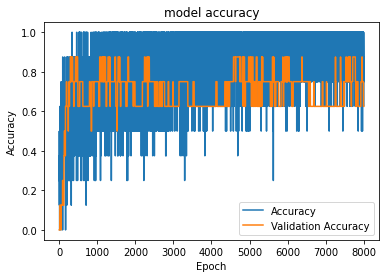

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

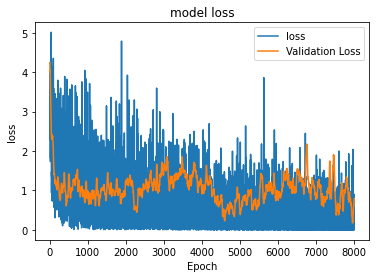

In [15]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [16]:
json_string = net_final.to_json()
with open("resnet_mouth_model.config", "w") as text_file:    
    text_file.write(json_string)

In [17]:
#net_final.save(WEIGHTS_FINAL)
net_final.save_weights(WEIGHTS_FINAL)

In [ ]:
if __name__ = 